## Medical Cost Personal Insurance Project

Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. 
These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation 
fees. The main purpose of medical insurance is to receive the best medical care without any strain 
on your finances. Health insurance plans offer protection against high medical costs. It covers 
hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides 
many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  
medical insurance is calculated .


Columns                                            
•age: age of primary beneficiary
•sex: insurance contractor gender, female, male
•bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•children: Number of children covered by health insurance / Number of dependents
•smoker: Smoking
•region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?

Dataset Link

https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score

In [284]:
medical_insurance_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
medical_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

In [285]:
medical_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [286]:
medical_insurance_df.shape

(1338, 7)

In [287]:
medical_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observation:
            1. no null values in any variables

In [288]:
medical_insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [289]:
medical_insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [290]:
medical_insurance_df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [291]:
# check for any blank records

medical_insurance_df.loc[medical_insurance_df['charges'] == ' '] 

,age,sex,bmi,children,smoker,region,charges


Observation:
            1. checked all 7 variables but none have any blank values

In [292]:
medical_insurance_df.shape

(1338, 7)

In [293]:
# check the duplicate values in rows

medical_insurance_df.duplicated().sum()

1

Observation:
            1. only one duplicate values in rows we found and so we are not deleting

In [294]:
medical_insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
Observations:
            1. No missing values
            2. Mean value is little > median value so it is right skew and postively correlated
            3. Looks like there are quite more number of outliers

## Data Visualization

In [295]:
# seperating numerical and categorical columns

cat_col = []
for i in medical_insurance_df.dtypes.index:
    if medical_insurance_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in medical_insurance_df.dtypes.index:
    if medical_insurance_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['sex', 'smoker', 'region']


Numerical Column ['age', 'bmi', 'children', 'charges']


male      676
female    662
Name: sex, dtype: int64


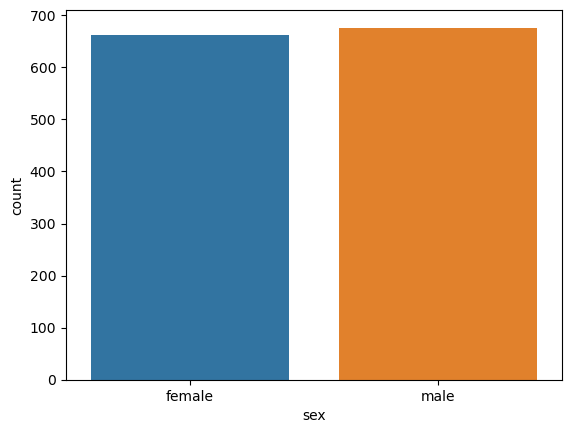

In [296]:
# Univariate Analysis

sns.countplot(x = 'sex', data = medical_insurance_df)
print(medical_insurance_df.sex.value_counts())

Observation:
            1. Male and Female counts are almost equal

no     1064
yes     274
Name: smoker, dtype: int64


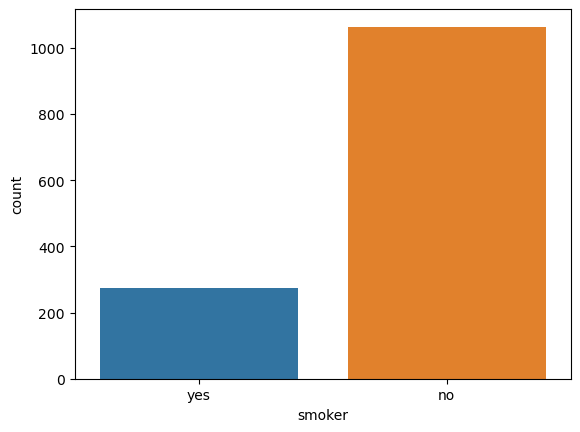

In [297]:
# Univariate Analysis

sns.countplot(x = 'smoker', data = medical_insurance_df)
print(medical_insurance_df.smoker.value_counts())

Observation:
            1. there are less number of smokers

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


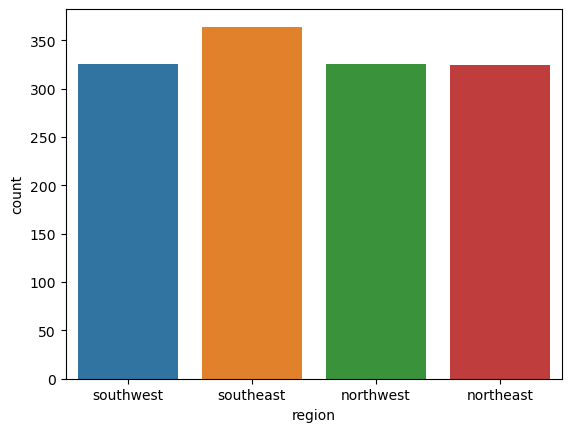

In [298]:
# Univariate Analysis

sns.countplot(x = 'region', data = medical_insurance_df)
print(medical_insurance_df.region.value_counts())

Observation:
            1. southwest, northwest and northeast regions are almost same
            2. southeast are little more compared to other regions

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


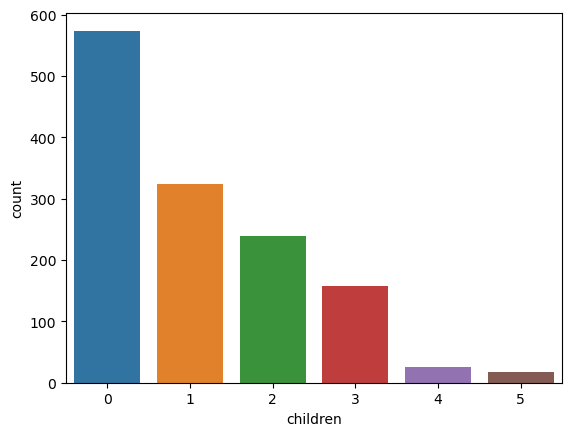

In [299]:
# Univariate Analysis

sns.countplot(x = 'children', data = medical_insurance_df)
print(medical_insurance_df.children.value_counts())

Observation:
            1. No children count are more than others
            2. Moderate counts of children - 1, 2 and 3

<AxesSubplot:xlabel='smoker', ylabel='age'>

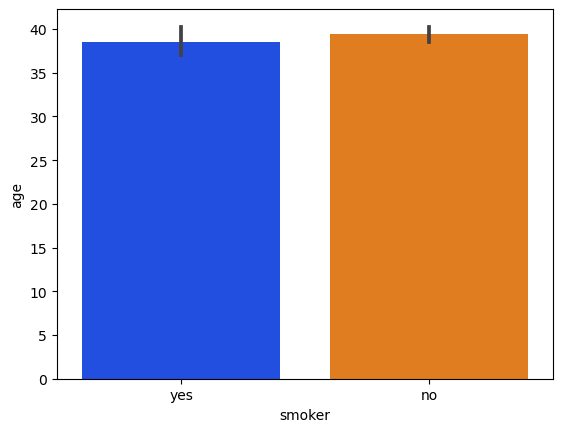

In [300]:
# Bivaraite Analysis

sns.barplot(x = 'smoker', y = 'age', data = medical_insurance_df, palette='bright')

Observation:
            1. most of the smoker age group are within 38

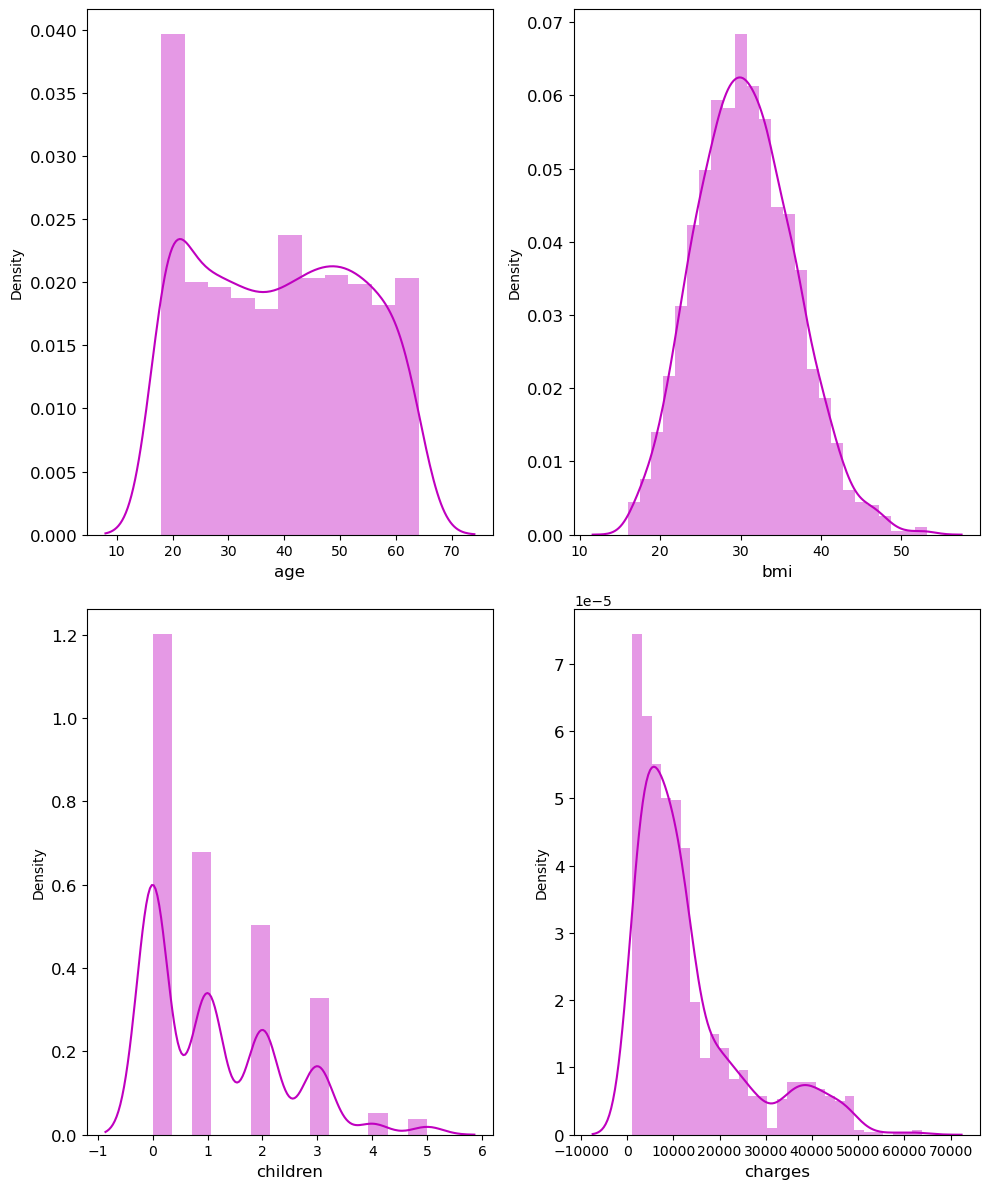

In [301]:
# lets visualize the data and analyse the relationship between features and label

# lets see how data is distributed for each numerical column

plt.figure(figsize=(10,12))
p = 1
for i in num_col:
    if p <= 4:
        ax = plt.subplot(2, 2, p)
        sns.distplot(medical_insurance_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. Concentarte only on continuous data like 'bmi' and 'charges' and check whether they 
               are normally distributed or not. 
            2. There are outliers in 'bmi'
            3. we need to deal with skewness in the data 

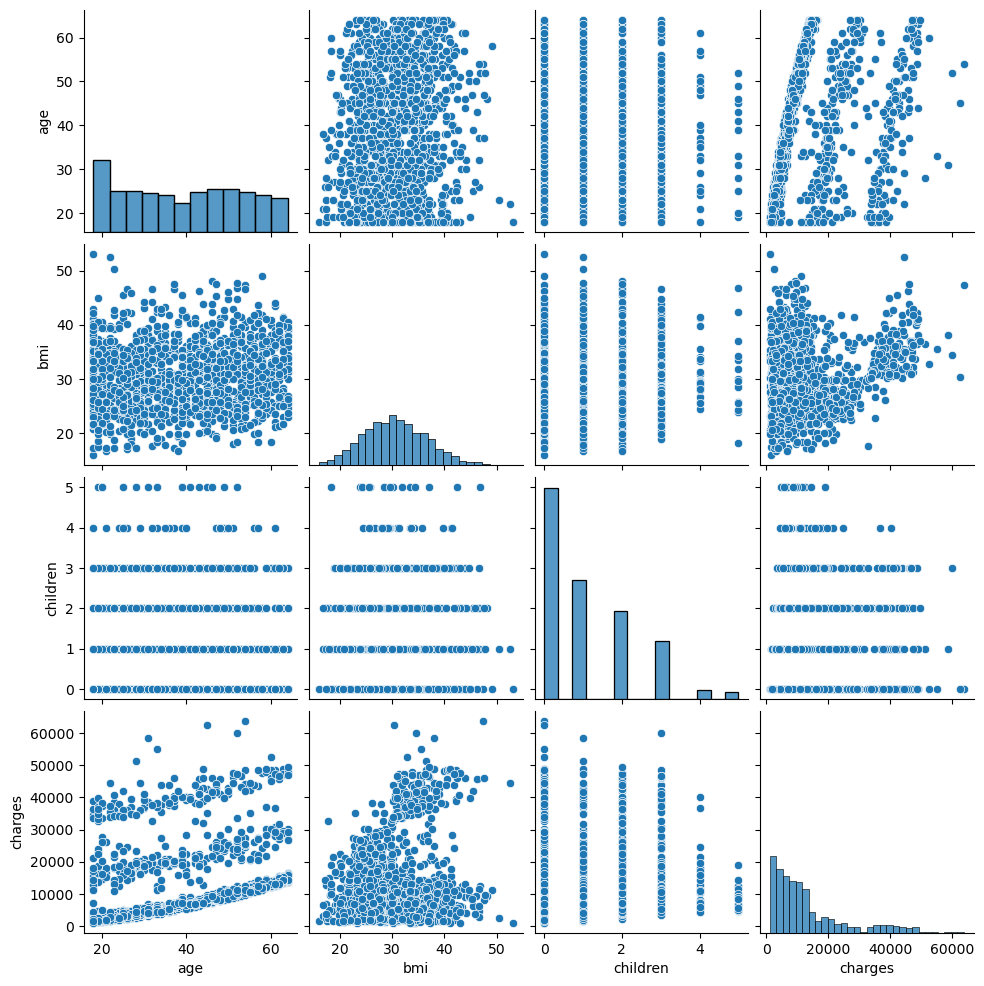

In [302]:
sns.pairplot(palette = 'Dark2', data = medical_insurance_df)

Observation:
            1. 'Age' shows a positive correlation with Charges.
            2. 'bmi' looks like a normal distribution

In [303]:
medical_insurance_df.shape

(1338, 7)

## Feature Encoding

## Change the categorical value into numbers, as ML model will not understand 'male' or 'female'

In [304]:
# Number of uniques values in each column 

medical_insurance_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [305]:
medical_insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [306]:
medical_insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [307]:
medical_insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [308]:
# Ordinal Encoding

# ML model wil not understand 'male' or 'female' so replace with 0 and 1

medical_insurance_df['sex'] = medical_insurance_df['sex'].replace({'female' : 1, 'male' : 0})

In [309]:
medical_insurance_df['sex'].unique()

array([1, 0], dtype=int64)

In [310]:
# Ordinal Encoding

# ML model wil not understand 'yes' or 'no' so replace with 1 and 0

medical_insurance_df['smoker'] = medical_insurance_df['smoker'].replace({'yes' : 1, 'no' : 0})

In [311]:
medical_insurance_df['smoker'].unique()

array([1, 0], dtype=int64)

In [312]:
# One Hot Encoding

# ML model wil not understand southwest/southeast/northwest/northeast so replace with 0/1/2/3

region = pd.get_dummies(medical_insurance_df.region, prefix = 'Region')
medical_insurance_df = pd.concat([medical_insurance_df,region], axis = 1)
medical_insurance_df.drop(columns = 'region', inplace = True)

In [313]:
medical_insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'Region_northeast', 'Region_northwest', 'Region_southeast',
       'Region_southwest'],
      dtype='object')

In [314]:
medical_insurance_df

,age,sex,bmi,children,smoker,charges,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


## Check for Multicollinearity

## Data Correlation find - whether we need all 07 columns

In [315]:
# get coefficient of one variable with all the other variables

cor = medical_insurance_df[['age', 'bmi', 'children', 'charges']].corr()
cor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


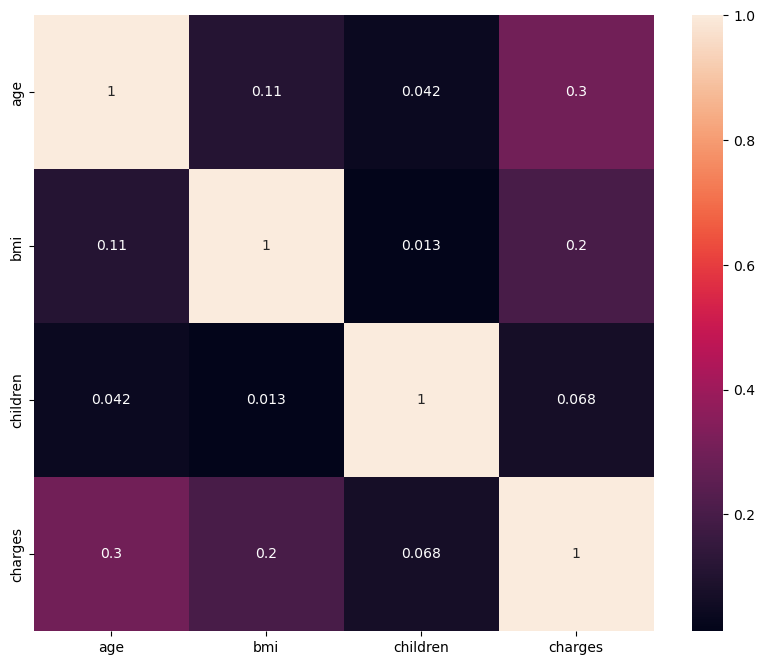

In [316]:
# visualize correlation using heatmap

plt.figure(figsize = (10, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [317]:
medical_insurance_df.corr().charges.sort_values(ascending = False)

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
Region_southeast    0.073982
children            0.067998
Region_northeast    0.006349
Region_northwest   -0.039905
Region_southwest   -0.043210
sex                -0.057292
Name: charges, dtype: float64

## Seperating features and target

In [318]:
medical_insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'Region_northeast', 'Region_northwest', 'Region_southeast',
       'Region_southwest'],
      dtype='object')

In [319]:
# we remove 'sex' feature as it does not play much role in insurance charges

x = medical_insurance_df.drop(['sex', 'charges'], axis = 1) 
y = medical_insurance_df['charges']

In [320]:
x

,age,bmi,children,smoker,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,27.900,0,1,0,0,0,1
1,18,33.770,1,0,0,0,1,0
2,28,33.000,3,0,0,0,1,0
3,33,22.705,0,0,0,1,0,0
4,32,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,1,0,0
1334,18,31.920,0,0,1,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [321]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

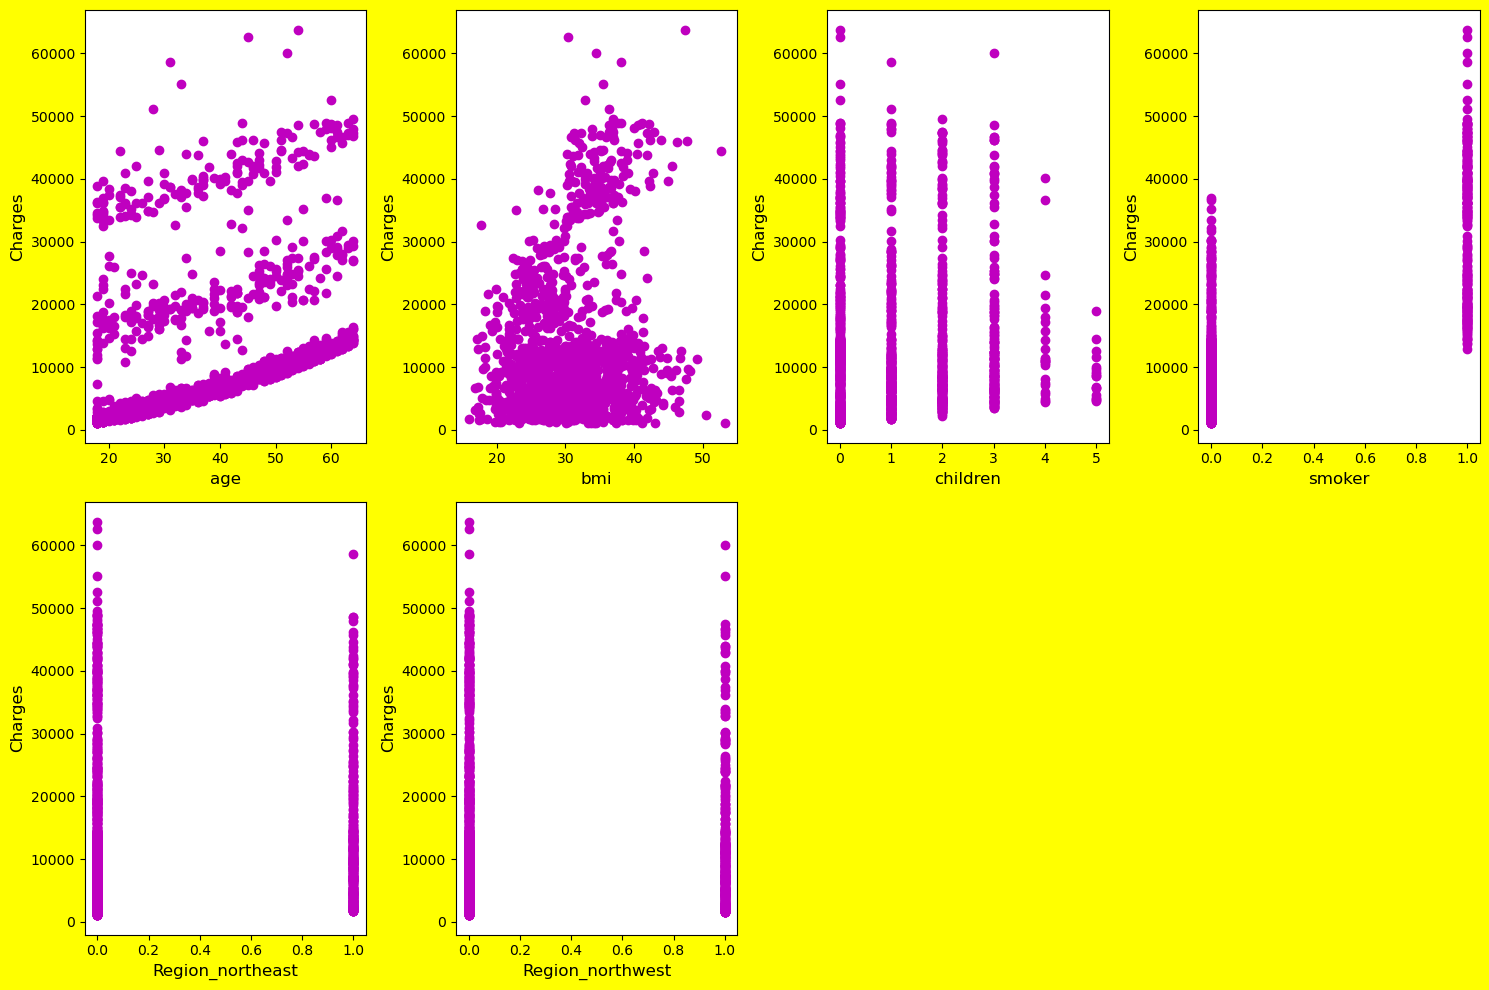

In [322]:
# lets check the relation between all the features and labels

plt.figure(figsize=(15,10), facecolor = 'yellow')
p = 1
for i in x:
    if p <= 6:
        ax = plt.subplot(2, 4, p)
        plt.scatter(x[i], y, color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.ylabel('Charges', fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. Looks like all features are correlated with label 'charges'. 

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [323]:
x.columns

Index(['age', 'bmi', 'children', 'smoker', 'Region_northeast',
       'Region_northwest', 'Region_southeast', 'Region_southwest'],
      dtype='object')

In [324]:
x1 = x

x1 = x1.drop(['smoker', 'Region_northeast','Region_northwest', 'Region_southeast', 'Region_southwest'], axis = 1)
x1.columns

Index(['age', 'bmi', 'children'], dtype='object')

In [325]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x1)
x_scaled

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [326]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x1.columns
vif

,VIF Values,Features
0,1.013816,age
1,1.012152,bmi
2,1.001874,children


Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we can observe all features are within the threshold value=5. 
               so there is no multicollinearity problem. 

## Checking Outliers

In [327]:
medical_insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'Region_northeast', 'Region_northwest', 'Region_southeast',
       'Region_southwest'],
      dtype='object')

In [328]:
# we dont check outliers for labels - so remove the label

medical_insurance_df_features = medical_insurance_df.drop(['sex', 'smoker', 'Region_northeast', 'Region_northwest', 'Region_southeast',
       'Region_southwest' , 'charges'], axis = 1)

In [329]:
medical_insurance_df_features

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


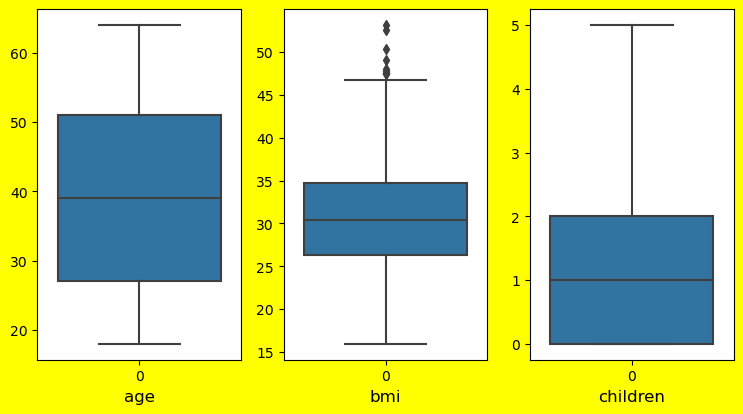

In [330]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in medical_insurance_df_features:
    if p <= 6:
        ax = plt.subplot(3, 4, p)
        sns.boxplot(data = medical_insurance_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [ ]:
observations:
            1. More Outliers found in features - 'bmi'
            2. Most of this outliers are right skewed (i.e. outliers are above max value)
            3. Remove the outliers

## Find IQR to identify outliers and remove it

In [331]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = medical_insurance_df.quantile(0.25)
q3 = medical_insurance_df.quantile(0.75)
iqr = q3 - q1

In [332]:
# validating one outlier

bmi_high = (q3['bmi'] + (1.5 * iqr['bmi']))
bmi_high

# anything > 47.29 outliers

47.290000000000006

In [333]:
# check the index which have the higher values

np_index = np.where(medical_insurance_df['bmi'] > bmi_high)
np_index

# remove these indexes as they are outliers

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [334]:
medical_insurance_df.shape

(1338, 10)

In [335]:
medical_insurance_df = medical_insurance_df.drop(medical_insurance_df.index[np_index])

In [336]:
medical_insurance_df.shape  # 9 rows removed - outliers

(1329, 10)

In [337]:
medical_insurance_df

,age,sex,bmi,children,smoker,charges,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [338]:
medical_insurance_df.reset_index(inplace = True, drop = True)

In [211]:
medical_insurance_df

,age,sex,bmi,children,smoker,charges,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1324,50,0,30.970,3,0,10600.54830,0,1,0,0
1325,18,1,31.920,0,0,2205.98080,1,0,0,0
1326,18,1,36.850,0,0,1629.83350,0,0,1,0
1327,21,1,25.800,0,0,2007.94500,0,0,0,1


## Checking for Skewness

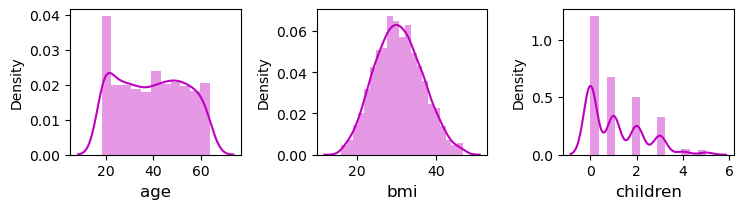

In [339]:
# how the data is distributed

plt.figure(figsize=(10,12))
p = 1
for i in medical_insurance_df_features:
    if p <= 18:
        ax = plt.subplot(6, 4, p)
        sns.distplot(medical_insurance_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [ ]:
Observation:
            1. 'age' is not normally distributed

In [340]:
medical_insurance_df.skew() # not in the range -0.5 to +0.5

age                 0.058413
sex                 0.016573
bmi                 0.157180
children            0.936628
smoker              1.471424
charges             1.500577
Region_northeast    1.199530
Region_northwest    1.190013
Region_southeast    1.045198
Region_southwest    1.194764
dtype: float64

Observation:
            1. 'children' are more than +0.5
            2. Do not touch skewness for categorical column and label
            3. Almost all other features - there are no skewness

In [341]:
# removing for skewness

medical_insurance_df['children'] = np.cbrt(medical_insurance_df['children'])

In [342]:
medical_insurance_df.skew() 

age                 0.058413
sex                 0.016573
bmi                 0.157180
children           -0.094779
smoker              1.471424
charges             1.500577
Region_northeast    1.199530
Region_northwest    1.190013
Region_southeast    1.045198
Region_southwest    1.194764
dtype: float64

In [ ]:
Observation:
            1. Almost all other features - there is no skewness.

## Modelling

In [343]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [344]:
x.columns

Index(['age', 'bmi', 'children', 'smoker', 'Region_northeast',
       'Region_northwest', 'Region_southeast', 'Region_southwest'],
      dtype='object')

In [345]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 348)

In [346]:
model_LR = LinearRegression()

In [347]:
model_LR.fit(x_train , y_train)

LinearRegression()

## Lets check how well model fits on train data

In [348]:
model_LR.score(x_train, y_train)

0.7526252952924674

## Lets check how well model fits on test data

In [349]:
model_LR.score(x_test, y_test)

0.740318431054651

In [350]:
y_pred = model_LR.predict(x_test)
y_pred

array([ 9.38288855e+03,  2.44793607e+04,  3.79857761e+04,  2.70792361e+04,
        1.34937722e+04,  9.29393526e+03,  2.59551510e+04,  6.12028162e+03,
        2.79475745e+04,  1.16741761e+04,  1.38568774e+04,  4.23882151e+03,
        7.55548434e+03, -7.61806299e+02,  5.41487369e+03,  2.58924186e+04,
        7.08834868e+03,  2.83393251e+04,  3.06657206e+04,  1.13761136e+04,
        4.47555321e+03,  1.46478861e+02,  1.39630418e+04,  2.98001375e+03,
        1.27498771e+04,  5.03848611e+03,  1.06338170e+04,  1.50263351e+03,
        4.83319596e+03,  4.18333044e+03,  2.51157638e+03,  7.93956484e+03,
        5.93329243e+03,  1.61195910e+04,  1.04092097e+04,  3.65981376e+04,
        1.20851811e+04,  6.95684315e+03, -1.93602889e+03,  1.30271763e+04,
        4.98812916e+03,  3.41660201e+04,  7.52463083e+03,  1.22181444e+04,
        6.86611190e+03,  3.28090644e+04,  4.66067602e+03,  1.68890745e+04,
        1.09978687e+04,  3.07419998e+04,  1.24686719e+04,  1.10385040e+04,
        2.68494522e+04,  

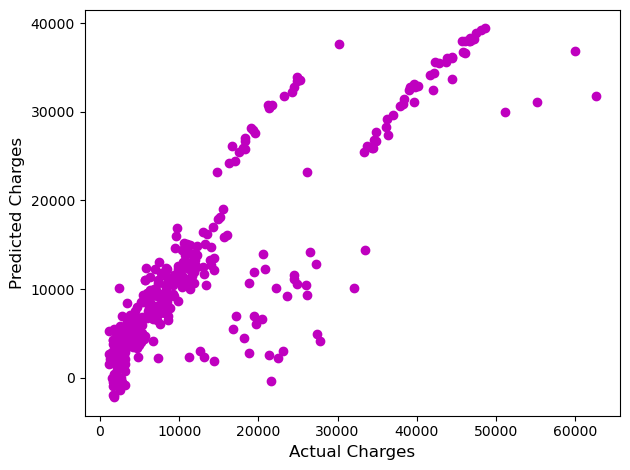

In [351]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
    
plt.tight_layout()

Observation:
            1. we are able to see good number of samples are following linear curve

## Model Evaluation

In [352]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [353]:
print("r2_score on test data ", r2_score(y_test, y_pred) * 100)

print("MAE ", mean_absolute_error(y_test, y_pred))

print("MSE ", mean_squared_error(y_test, y_pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score on test data  74.0318431054651
MAE  4560.270597600869
MSE  45992328.83388564
RMSE  6781.76443367695


## Regularization

## To check whether Linear Regression Model is overfitting or not - so use Regularization

In [354]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [355]:
lassocv = LassoCV(alphas = None, max_iter = 10)

In [356]:
lassocv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [357]:
# learning rate - model has learned at this rate

alpha = lassocv.alpha_
alpha

50.30840894649281

## Lasso Regularization Model

In [358]:
lasso_model = Lasso(alpha)

In [359]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=50.30840894649281)

In [360]:
lasso_model.score(x_test, y_test)

0.7379021792388807

In [361]:
# Linear Regression Model

model_LR.score(x_test, y_test)

0.740318431054651

observation:
            1. Linear Regression Model was not overfitting - 
                 as Linear Regression Model and Lasso model gave almost same result 0.74
            2. If at all overfits avoid it

## Ridge Regularization

In [362]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01))

In [363]:
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [364]:
# learning rate - model has learned at this rate , it is telling to use 0.09 value

ridgecv.alpha_

0.09099999999999998

In [365]:
ridge_model = Ridge(alpha = ridgecv.alpha_)

In [366]:
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [367]:
ridge_model.score(x_test, y_test)

0.7402501225696986

In [368]:
# Linear Regression Model

model_LR.score(x_test, y_test)

0.740318431054651

observation:
            1. Linear Regression Model was not overfitting - 
                 as Linear Regression Model, Lasso model and Ridge model gave same result 0.74
            2. Therefore no overfitting

## Hyperparameter Tuning

In [369]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1.0, 0.05, 0.4, 2], 'fit_intercept': [True, False], 
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
             'positive': [False, True], 'random_state': [1, 4, 10, 20]}

In [370]:
ridge = GridSearchCV(Ridge(), parameters, cv = 5)

In [371]:
ridge.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [372]:
ridge.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 20,
 'solver': 'saga'}

In [373]:
final_model = Ridge(alpha = 0.05, fit_intercept = True, positive = False, random_state = 20, solver = 'saga')

final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)

print("r2_score on test data ", r2_score(y_test, pred) * 100)

print("MAE ", mean_absolute_error(y_test, pred))

print("MSE ", mean_squared_error(y_test, pred))

print("RMSE ", np.sqrt(mean_squared_error(y_test, pred)))

r2_score on test data  73.88782800995142
MAE  4582.979458438149
MSE  46247394.66920113
RMSE  6800.543703940232


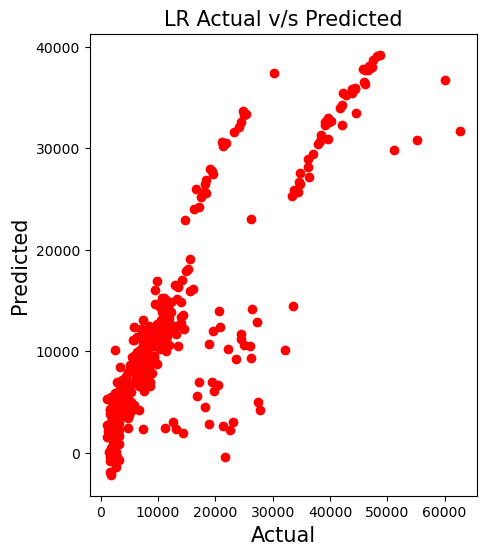

In [374]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test, y = pred, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('LR Actual v/s Predicted', fontsize=15)
plt.show()

## Saving the model

In [376]:
import pickle
filename = "Medical_Insurance_Cost_LR_Model.pkl"
pickle.dump(final_model, open(filename, 'wb'))

## Predict the saved model

In [378]:
# lets load the saved model and get the prediction

loaded_model = pickle.load(open('Medical_Insurance_Cost_LR_Model.pkl', 'rb'))

result = loaded_model.score(x_test, y_test)
print(result)

0.7388782800995142


Observation:
            1. Moderately actual and predicted values match
            2. This Medical_Insurance_Cost_Model.pkl can be used to predict the charge of the medical
               insurance

## Random Forest Regression

In [379]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [380]:
pred_RFR = RFR.predict(x_test)
pred_RFR

array([ 8119.6068557 , 19564.6933789 , 46948.4061959 , 23718.5770083 ,
       15265.0407356 , 11842.4316396 , 21468.2463863 ,  5103.7465758 ,
       20325.8751159 , 17329.2513321 , 11792.814552  ,  2095.8229655 ,
        6741.01016   ,  1873.5338975 ,  4712.1302946 , 35314.2978597 ,
        4239.9036511 , 36148.7865443 , 22816.0160259 , 10171.6601417 ,
        7163.3253251 ,  1736.0212395 , 11283.394331  ,  3505.7794332 ,
       13896.3588075 ,  2742.3305452 ,  8978.0208123 ,  2572.2848836 ,
        2110.5011131 ,  1867.64358025,  3168.0899682 ,  5688.6486267 ,
        4537.8049039 , 17129.0676385 , 15384.3909484 , 43743.3627055 ,
       12031.7712651 ,  4925.6629857 ,  1269.930489  , 11195.8842062 ,
        6286.8111542 , 41194.9144445 , 10477.223221  ,  8884.5853559 ,
        5221.276207  , 39988.2726568 ,  8142.8264944 , 11284.0534126 ,
        9488.4715193 , 23290.259467  , 12426.762063  ,  7444.3409329 ,
       35400.1784887 , 13081.4891292 , 10437.0825704 ,  1651.46605887,
      

In [381]:
## Lets check how well model fits on train data

RFR.score(x_train, y_train)

0.9785913736182855

In [382]:
## Lets check how well model fits on test data

RFR.score(x_test, y_test)

0.8355865350934572

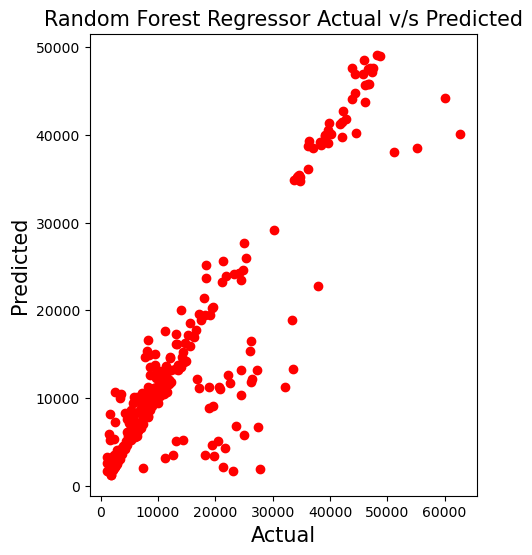

In [383]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test, y = pred_RFR, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Random Forest Regressor Actual v/s Predicted', fontsize=15)
plt.show()

In [384]:
print("r2_score on test data ", r2_score(y_test, pred_RFR) * 100)

print("MAE ", mean_absolute_error(y_test, pred_RFR))

print("MSE ", mean_squared_error(y_test, pred_RFR))

print("RMSE ", np.sqrt(mean_squared_error(y_test, pred_RFR)))

r2_score on test data  83.55865350934572
MAE  2810.066786868185
MSE  29119348.644614957
RMSE  5396.234672863566


## Saving the model

In [385]:
import pickle
filename = "Medical_Insurance_Cost_RFR_Model.pkl"
pickle.dump(RFR, open(filename, 'wb'))

## Predict the saved model

In [386]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('Medical_Insurance_Cost_RFR_Model.pkl', 'rb'))

result1 = loaded_model1.score(x_test, y_test)
print(result1)

0.8355865350934572


In [ ]:
Observation:
            1. Actual and predicted values almost matches
            2. This Medical_Insurance_Cost_RFR_Model.pkl can be used to predict the charge of the medical
               insurance

In [ ]:
Observation:
            1. Linear Regression model - testing accuracy - 0.737 
            2. Random Forest Regressor model - testing accuracy - 0.835
            3. Comparing both the models - Random Forest Regressor model has the higher accuracy